# WeatherPy
----

#### Overview

An investigation of weather based on a list of randomly generated cities.

Code will generate a list of cities within a specific range for latitude (-90, 90) and longitude (-180, 180) coordinates. Using the Open Weather Map API, various metrics including temperature and humidity will be gathered and stored in a dataframe using sets of 50 records based on the lsit of cities. This is exported as a csv file to be used by the additional analyses in the accompanying juputer notebook (VacationPy).

The final portion includes a collection of scatter plots comparing latitude of cities with different weather metrics. Lastly, regressions are performed to determine if there is any causal relationship between latitude and weather.

In [95]:
# Install citypy if not already installed

!pip3 install citipy

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key from seperate py file
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities generated: {len(cities)}")

Number of cities generated: 599


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# Url for weather map API

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print out for results
print("Beginning Data Retrieval")
print("-----------------------------")


# Counter variables
count_record = 0
count_set = 1


# Loop through cities list (created in prior step)
for i, city in enumerate(cities):
    
    # Group cities into sets, keep count of sets
    if (i % 50 == 0 and i >= 50):
        count_set += 1
        count_record = 0
        
    # Create endpoint URL, append city info to url
    city_url = url + "&q=" + city
        
    # Record url, counts for records and sets
    # Offset value for count_record by 1 so statement looks better visually
    print("Processing Record %s of Set %s | %s" % (count_record+1, count_set, city))
        
    # Increment count of records by 1
    count_record += 1
        
    # Usy try to get API requests for each city
    try:
        # Save json results into a variable
        weather_result = requests.get(city_url).json()
            
        # Save results of max temp, humidity, cloudiness as variables
        lat_result = weather_result["coord"]["lat"]
        lng_result = weather_result["coord"]["lon"]
        max_temp = weather_result["main"]["temp_max"]
        humidity = weather_result["main"]["humidity"]
        clouds = weather_result["clouds"]["all"]
        wind = weather_result["wind"]["speed"]
        country = weather_result["sys"]["country"]
        date_result = weather_result["dt"]
            
            
        # Append results into city_data list
        city_data.append({"City": city,
                          "Lat": lat_result,
                          "Lng": lng_result,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date_result})
        
    # Except for errors
    except:
        print("City not found. Skipping...")
        pass

# Final print lines when complete

print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | salalah
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | dayong
Processing Record 10 of Set 1 | bonavista
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | chimore
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | moose factory
Processing Record 21 of Set 1 | darab
Proces

Processing Record 37 of Set 4 | kirakira
Processing Record 38 of Set 4 | kinel-cherkassy
Processing Record 39 of Set 4 | zaysan
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | nguiu
City not found. Skipping...
Processing Record 42 of Set 4 | semirom
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | traverse city
Processing Record 45 of Set 4 | hobyo
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 49 of Set 4 | leninsk
Processing Record 50 of Set 4 | kokubu
Processing Record 1 of Set 5 | tezu
Processing Record 2 of Set 5 | oostburg
Processing Record 3 of Set 5 | aklavik
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | carahue
Processing Record 6 of Set 5 | wisconsin rapids
Processing Record 7 of Set 5 | kargil
Processing Record 8 of 

Processing Record 26 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 27 of Set 8 | nizhnyaya tavda
Processing Record 28 of Set 8 | sao joao da barra
Processing Record 29 of Set 8 | zhaotong
Processing Record 30 of Set 8 | samusu
City not found. Skipping...
Processing Record 31 of Set 8 | saint-augustin
Processing Record 32 of Set 8 | marienburg
Processing Record 33 of Set 8 | todos santos
Processing Record 34 of Set 8 | ammon
Processing Record 35 of Set 8 | saint-pierre
Processing Record 36 of Set 8 | casper
Processing Record 37 of Set 8 | opuwo
Processing Record 38 of Set 8 | ola
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | medeiros neto
Processing Record 41 of Set 8 | freeport
Processing Record 42 of Set 8 | poya
Processing Record 43 of Set 8 | rehoboth
Processing Record 44 of Set 8 | huazolotitlan
City not found. Skipping...
Processing Record 45 of Set 8 | mimongo
Processing Record 46 of Set 8 | powell river
Processing Record 47 of Set 8 |

Processing Record 14 of Set 12 | xiongyue
Processing Record 15 of Set 12 | bani
Processing Record 16 of Set 12 | trinidad
Processing Record 17 of Set 12 | muroto
Processing Record 18 of Set 12 | adre
Processing Record 19 of Set 12 | batagay-alyta
Processing Record 20 of Set 12 | lianran
Processing Record 21 of Set 12 | palatka
Processing Record 22 of Set 12 | nyurba
Processing Record 23 of Set 12 | ilheus
Processing Record 24 of Set 12 | azimur
City not found. Skipping...
Processing Record 25 of Set 12 | constantine
Processing Record 26 of Set 12 | baiyin
Processing Record 27 of Set 12 | lima
Processing Record 28 of Set 12 | bengkulu
Processing Record 29 of Set 12 | necochea
Processing Record 30 of Set 12 | san patricio
Processing Record 31 of Set 12 | lufilufi
Processing Record 32 of Set 12 | lamar
Processing Record 33 of Set 12 | simbahan
Processing Record 34 of Set 12 | yima
Processing Record 35 of Set 12 | bonthe
Processing Record 36 of Set 12 | pinawa
Processing Record 37 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# Convert json data into dataframe

city_data_pd = pd.DataFrame(city_data)

# Show dataframe top 5 rows
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-7.28,82,92,7.67,RU,1611956247
1,touros,-5.1989,-35.4608,80.60,74,20,12.66,BR,1611956296
2,rikitea,-23.1203,-134.9692,80.11,67,88,7.54,PF,1611956297
3,salalah,17.0151,54.0924,73.40,60,75,5.75,OM,1611956297
4,cape town,-33.9258,18.4232,69.01,82,20,9.22,ZA,1611956138


In [42]:
# Show descriptive table of dataframe

city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.676997,16.985889,47.997441,73.471664,53.585009,8.518665,1.611956e+09
std,33.539287,92.389328,33.535316,18.734129,40.103730,5.620823,7.679680e+01
min,-54.800000,-175.200000,-49.860000,9.000000,0.000000,0.130000,1.611956e+09
25%,-9.728350,-66.339600,27.220000,65.000000,8.000000,4.315000,1.611956e+09
50%,24.687700,24.662200,59.160000,77.000000,71.000000,7.020000,1.611956e+09
75%,48.280300,101.225700,75.580000,87.000000,91.500000,11.640000,1.611956e+09
max,78.218600,178.416700,91.400000,100.000000,100.000000,33.580000,1.611956e+09


## Inspect the data and remove the cities where the humidity > 100%.
----


No cities were found with humidity over 100%.

Including incase testing reruns generate dataset with higher humidity

In [43]:
# Show descriptives for humidity column

city_data_pd["Humidity"].describe()

count    547.000000
mean      73.471664
std       18.734129
min        9.000000
25%       65.000000
50%       77.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [44]:
#  Get the indices of cities that have humidity over 100%.

humidity_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

humidity_data

Int64Index([], dtype='int64')

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_pd.drop(humidity_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-7.28,82,92,7.67,RU,1611956247
1,touros,-5.1989,-35.4608,80.60,74,20,12.66,BR,1611956296
2,rikitea,-23.1203,-134.9692,80.11,67,88,7.54,PF,1611956297
3,salalah,17.0151,54.0924,73.40,60,75,5.75,OM,1611956297
4,cape town,-33.9258,18.4232,69.01,82,20,9.22,ZA,1611956138


## Data Extraction

Extract fields from cleaned data to use for charts

Export dataframe as a csv file to use in later analyses

In [57]:
# Extract fields to use later in charts

lat = clean_city_data["Lat"]
temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudy = clean_city_data["Cloudiness"]
windy = clean_city_data["Wind Speed"]
dates = clean_city_data["Date"]

# Export cleaned csv to use in Vacation jupyter notebook steps
clean_city_data.to_csv(output_data_file, index_label="city_id" )

## Plotting the Data

* Charts include labeling and the date of the analysis

* All figures are saved as .pngs files in the output_data folder

## Latitude vs. Temperature Plot

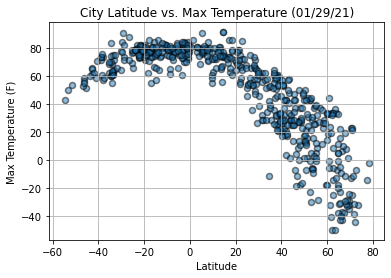

In [98]:
# Scatter plot for latitude vs temperature

plt.scatter(lat, temp, edgecolor="black", linewidth=1.5,
           marker="o", alpha=0.5, label="Cities")

# Include formatting with todays date
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")

# Add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save pic as png
plt.savefig("output_data/Fig-lat-temp")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

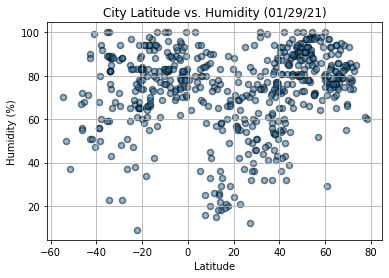

In [97]:
# Scatter plot for latitude vs Humidity

plt.scatter(lat, humidity, edgecolor="black", linewidth=1.5,
           marker="o", alpha=0.5, label="Cities")

# Include formatting with todays date
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")

# Add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save pic as png
plt.savefig("output_data/Fig-lat-humidity")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

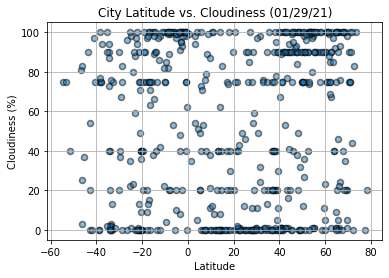

In [96]:
# Scatter plot for latitude vs cloudiness

plt.scatter(lat, cloudy, edgecolor="black", linewidth=1.5,
           marker="o", alpha=0.5, label="Cities")

# Include formatting with todays date
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")

# Add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save pic as png
plt.savefig("output_data/Fig-lat-cloudiness")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

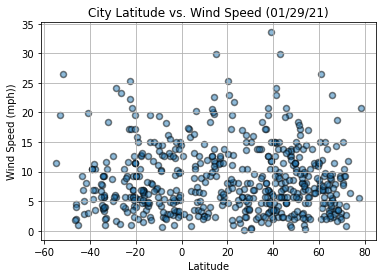

In [99]:
# Scatter plot for latitude vs wind speed

plt.scatter(lat, windy, edgecolor="black", linewidth=1.5,
           marker="o", alpha=0.5, label="Cities")

# Include formatting with todays date
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")

# Add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.grid()

# Save pic as png
plt.savefig("output_data/Fig-lat-wind")

# Show plot
plt.show()

## Linear Regression

In [133]:
# Create function to call for each regression analysis

def regression_function(x_values, y_values, title, text_coordinates):
    
    # Regression calculation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Plot scatter chart
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Add regression line
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        
    # Add x labels depending on whether north or south
    if max(x_values) > 0:
        plt.xlabel("Latitude (Northern Hemisphere)")
    elif max(x_values) <= 0:
        plt.xlabel("Latitude (Southern Hemisphere)")
    
    # Add y label equal to title parameter
    plt.ylabel(title)
    
    # Print r-squared value
    print(f"The r-value is: {rvalue**2}")
        
    # Show plot
    plt.show()
 
        

In [109]:
# Dataframes for sourthern and northern hemisphere data (above or below lat zero)

north_df = clean_city_data.loc[(clean_city_data["Lat"] > 0), :]
south_df = clean_city_data.loc[(clean_city_data["Lat"] <= 0), :]

# Confirm northern hemishere dataframe
north_df.head(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-7.28,82,92,7.67,RU,1611956247
3,salalah,17.0151,54.0924,73.40,60,75,5.75,OM,1611956297


In [110]:
# Confirm southern hemishere dataframe
south_df.head(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,touros,-5.1989,-35.4608,80.60,74,20,12.66,BR,1611956296
2,rikitea,-23.1203,-134.9692,80.11,67,88,7.54,PF,1611956297


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7230856038209107


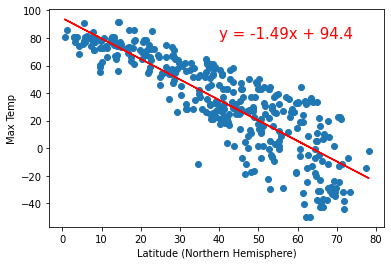

In [134]:
# Get x and y values for latititude and max temp using north_df
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]

# Plot linear regression using function
regression_function(x_values, y_values, "Max Temp", (40, 80))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3496898207113271


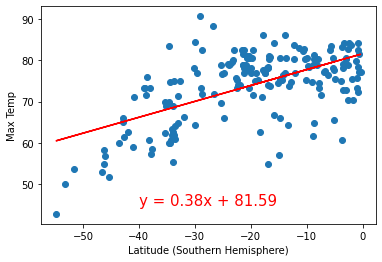

In [135]:
# Get x and y values for latititude and max temp using south_df
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]

# Plot linear regression using function
regression_function(x_values, y_values, "Max Temp", (-40, 45))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16790374401969083


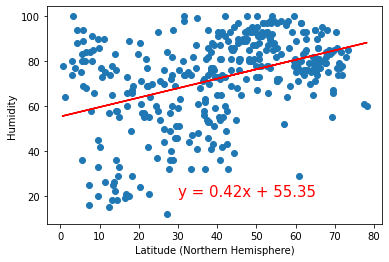

In [137]:
# Get x and y values for latititude and humidity using north_df
x_values = north_df["Lat"]
y_values = north_df["Humidity"]

# Plot linear regression using function
regression_function(x_values, y_values, "Humidity", (30, 20))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08960175512749534


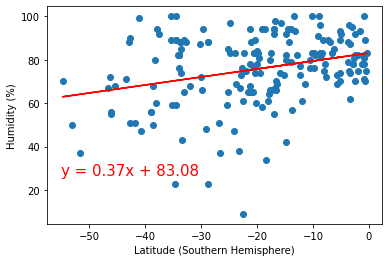

In [144]:
# Get x and y values for latititude and humidity using south_df
x_values = south_df["Lat"]
y_values = south_df["Humidity"]

# Plot linear regression using function
regression_function(x_values, y_values, "Humidity (%)", (-55, 27))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07784793335556184


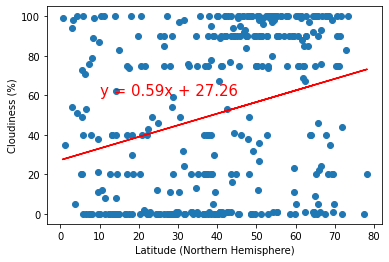

In [146]:
# Get x and y values for latititude and cloudiness using north_df
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]

# Plot linear regression using function
regression_function(x_values, y_values, "Cloudiness (%)", (10, 60))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07909962174599727


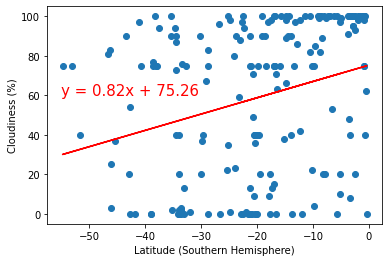

In [148]:
# Get x and y values for latititude and cloudiness using south_df
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]

# Plot linear regression using function
regression_function(x_values, y_values, "Cloudiness (%)", (-55, 60))


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011174257729095735


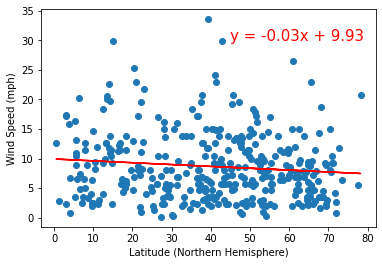

In [155]:
# Get x and y values for latititude and wind speed using north_df
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]

# Plot linear regression using function
regression_function(x_values, y_values, "Wind Speed (mph)", (45, 30))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 4.451564161798827e-06


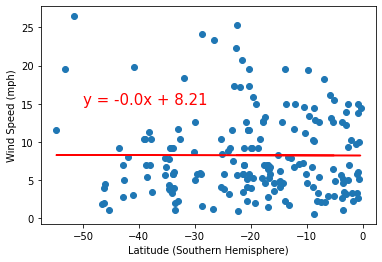

In [157]:
# Get x and y values for latititude and wind speed using south_df
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]

# Plot linear regression using function
regression_function(x_values, y_values, "Wind Speed (mph)", (-50, 15))
